Text(0.5, 0, 'Z')

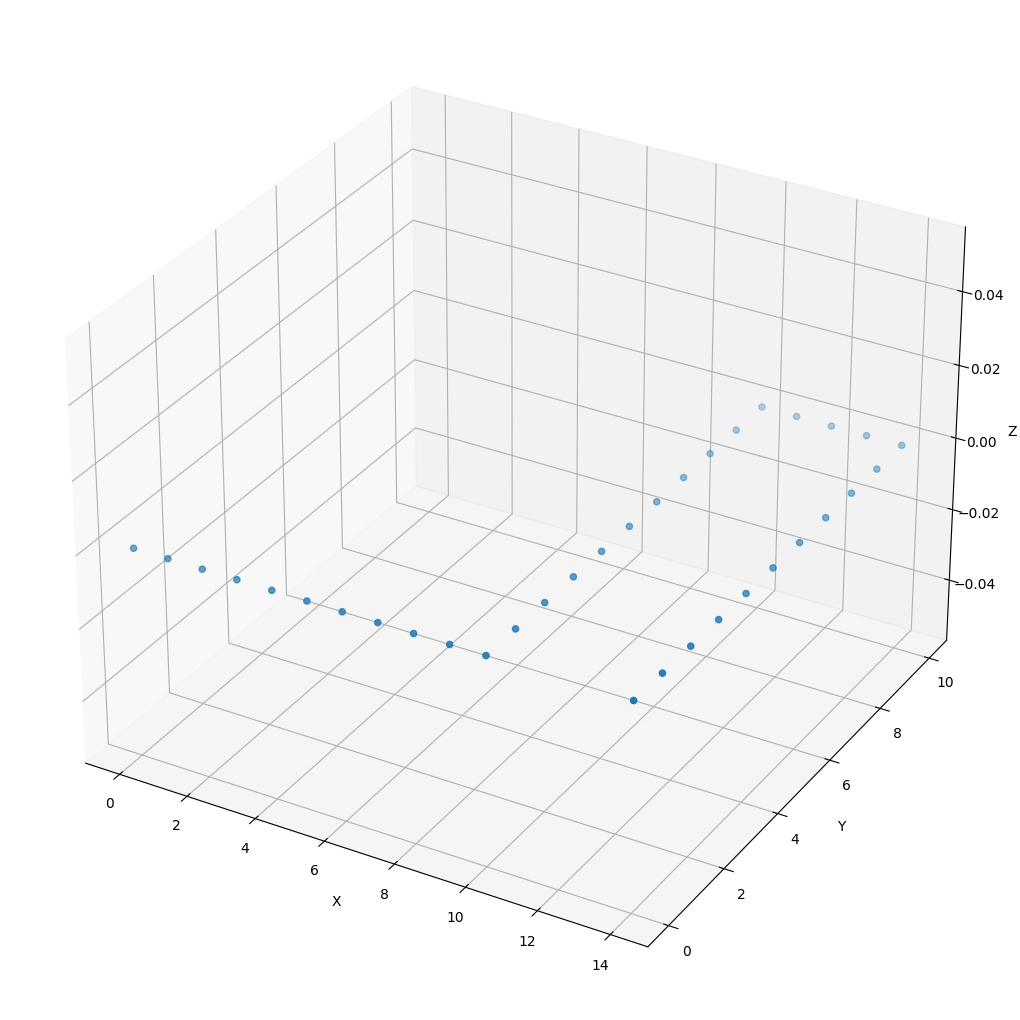

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Se declara y se imprime todo lo proporcionado en el enunciado
#del ejercicio
pxB = np.array([ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10,
                10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 12, 13,
                14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14])
pyB = np.array([ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
                2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10,
                10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0])
pzB = np.array([ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
pB = np.array([pxB, pyB, pzB])

X, Y = np.meshgrid(pxB, pyB)

fig = plt.figure(figsize=(30,13))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(pxB, pyB, pzB)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

**Ejercicio 1**
Represente las posiciones de los puntos respecto de la trama {A} cuando:

a. La trama {B} se gira un ángulo α = 90º alrededor del eje XA.

b. La trama {B} se gira un ángulo α = 90º alrededor del eje YA.

c. La trama {B} se gira un ángulo α = 90º alrededor del eje ZA.

Interprete el resultado.

In [2]:
#Función para desplazar y rotar un punto con una matriz de transformación homogénea
#En este caso, es respecto al eje x, las sucesivas funciones serán para los distintos
#ejes, lo unico que cambia es la matriz R de cosenos directores
def rotar_x(punto, despl, theta):
  R = np.array([[1, 0, 0],
              [0, np.cos(theta), -np.sin(theta)],
              [0, np.sin(theta), np.cos(theta)]])  # Matriz de rotación sobre x
  M = np.zeros((4, 4))  # Matriz de ceros 4x4

  despl = np.append(despl, 1)
  M[:3, :3] = R  # Asignar la matriz de rotación a la primera submatriz
  M[: , 3] = despl #La última columna es el desplazamiento

  punto = np.append(punto, 1)

  return np.dot(M , punto)
def rotar_y(punto, despl, theta):
  R = [[np.cos(theta), 0, np.sin(theta)],
        [0, 1, 0],
     [-np.sin(theta), 0, np.cos(theta)]]
  M = np.zeros((4, 4))  # Matriz de ceros 4x4
  despl = np.append(despl, 1)
  M[:3, :3] = R  # Asignar la matriz de rotación a la primera submatriz
  M[: , 3] = despl #La última columna es el desplazamiento

  punto = np.append(punto, 1)
  return np.dot(M,punto)
def rotar_z(punto, despl, theta):
  R = np.array([[np.cos(theta), -np.sin(theta), 0],
              [np.sin(theta), np.cos(theta), 0],
              [0, 0, 1]])  # Matriz de rotación sobre z
  M = np.zeros((4, 4))  # Matriz de ceros 4x4
  despl = np.append(despl, 1)
  M[:3, :3] = R  # Asignar la matriz de rotación a la primera submatriz
  M[: , 3] = despl #La última columna es el desplazamiento

  punto = np.append(punto, 1)

  return np.dot(M , punto)

#Se puede obtener las distintas matrices de rotacion usando
#apply_along_axis en el eje 0, pasando los distintos parámetros
resultado = np.apply_along_axis(rotar_x, 0, arr = pB, despl=[0,0,0], theta = np.pi / 2)
resultado2 = np.apply_along_axis(rotar_y, 0, arr = pB, despl=[0,0,0], theta = np.pi / 2)
resultado3 = np.apply_along_axis(rotar_z, 0, arr = pB, despl=[0,0,0], theta = np.pi / 2)




Text(0.5, 0, 'Z')

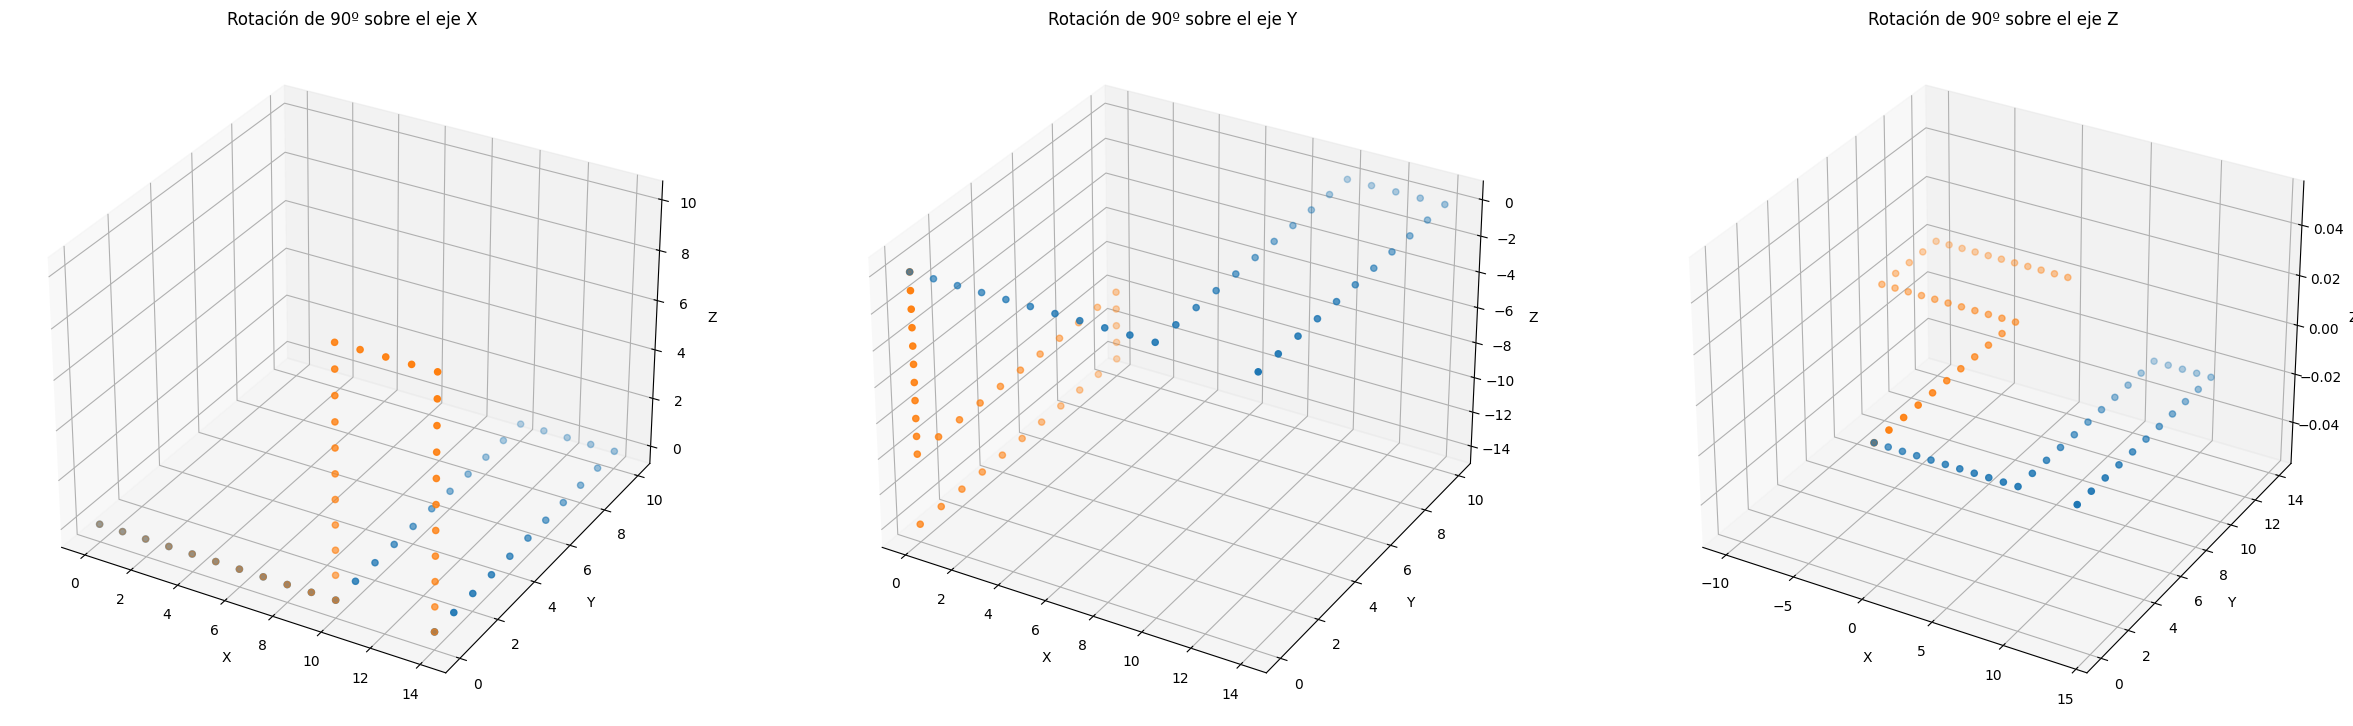

In [3]:
#En este bloque se imprime todo lo que se hace en el ejercicio 1

fig = plt.figure(figsize=(30,20))

ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(pxB, pyB, pzB)
ax1.scatter(resultado[0], resultado[1], resultado[2])
ax1.set_title("Rotación de 90º sobre el eje X")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')


ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(pxB, pyB, pzB)
ax2.scatter(resultado2[0], resultado2[1], resultado2[2])
ax2.set_title("Rotación de 90º sobre el eje Y")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(pxB, pyB, pzB)
ax3.scatter(resultado3[0], resultado3[1], resultado3[2])
ax3.set_title("Rotación de 90º sobre el eje Z")
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')

Ejercicio 2

Represente las posiciones de los puntos respecto de la trama {A} cuando la
trama {B} del ejercicio anterior se rota desde la posición original (superpuesta
a la trama {A}) en torno al eje XB un ángulo γ = 60º, a continuación se gira
en torno al eje YB un ángulo β = 90º, y después se gira en torno al eje ZB un
ángulo α = 30º.

Compruebe como afecta el orden de las rotaciones en las coordenadas respecto
de la trama {A}. Comente el resultado.

Text(0.5, 0, 'Z')

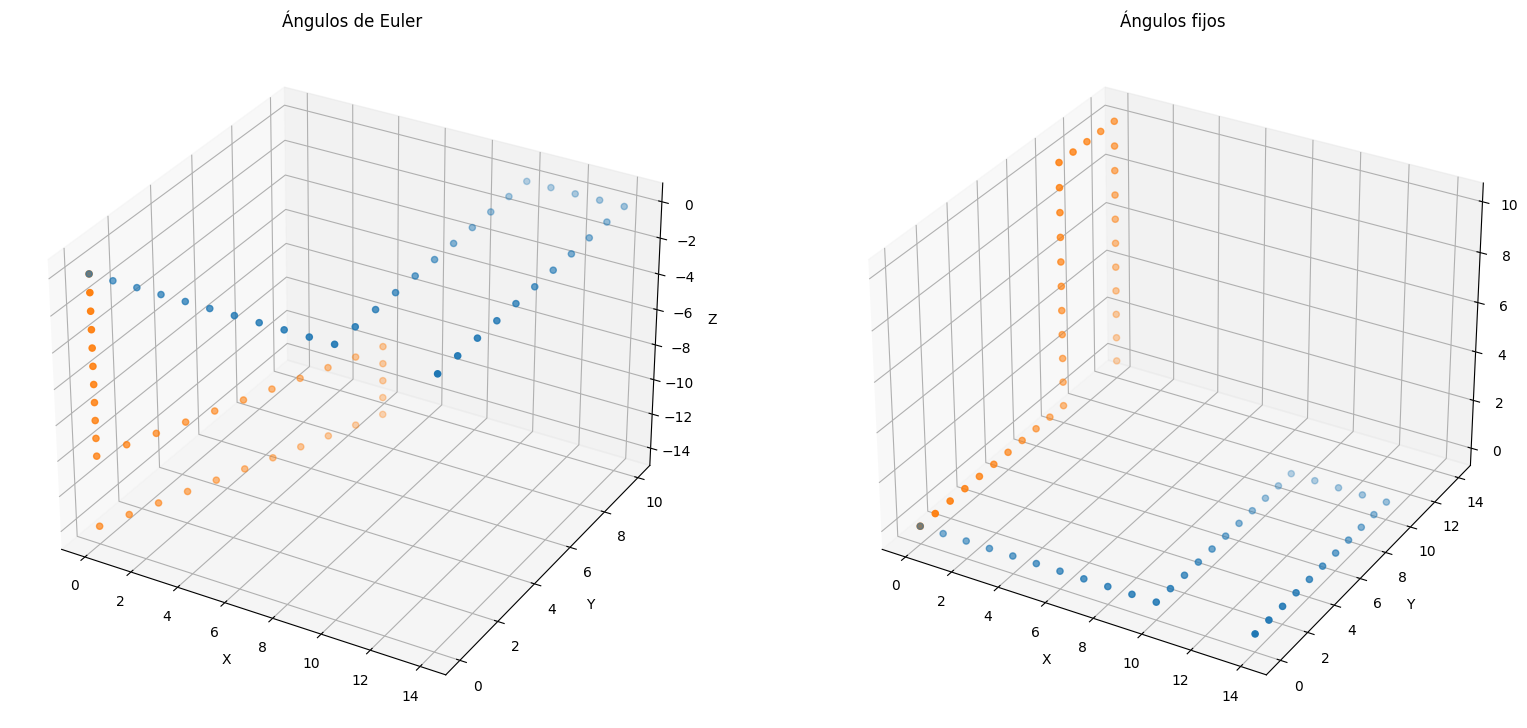

In [4]:
#Supongo que las distintas rotaciones se hacen sobre ejes móviles, así que no hay que tomar el orden inverso para las rotaciones si no que se hace
#tal como viene

#Igual que el ejercicio 1 pero se van acumulando los cambios sobre el resultado anterior
resultado1 = np.apply_along_axis(rotar_x, 0, arr = pB, despl=[0,0,0], theta = np.pi/3)

resultado2 = np.apply_along_axis(rotar_y, 0, arr = resultado1[:resultado1.shape[0]-1], despl=[0,0,0], theta = np.pi/2)

resultado3 = np.apply_along_axis(rotar_z, 0, arr = resultado2[:resultado2.shape[0]-1], despl=[0,0,0], theta = np.pi/6)

#En este caso se hace con ángulos fijos
resultado4 = np.apply_along_axis(rotar_z, 0, arr = pB, despl=[0,0,0], theta = np.pi/6)
resultado5 = np.apply_along_axis(rotar_y, 0, arr = resultado4[:resultado1.shape[0]-1], despl=[0,0,0], theta = np.pi/2)
resultado6 = np.apply_along_axis(rotar_x, 0, arr = resultado5[:resultado1.shape[0]-1], despl=[0,0,0], theta = np.pi/3)


fig = plt.figure(figsize=(30,20))

ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(pxB, pyB, pzB)
ax1.scatter(resultado3[0], resultado3[1], resultado3[2])
ax1.set_title("Ángulos de Euler")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(pxB, pyB, pzB)
ax2.scatter(resultado6[0], resultado6[1], resultado6[2])
ax2.set_title("Ángulos fijos")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')




Ejercicio 3.

Diseñe e implemente una función en Python que reciba como entrada una matriz de dimensión n × 4 con los parámetros de Denavit-Hartenberg de un manipulador cualquiera, y devuelva como salida la matriz de transformación homogénea (como un array de dimensión 4 × 4) que relaciona el sistema de coordenadas de la base y el sistema de coordenadas del extremo del robot. Contemple la posibilidad de que los ángulos de rotación y los desplazamientos sean variables simbólicas (use el paquete sympy). Compruebe el correcto funcionamiento de la función con algunos ejemplos.

In [5]:
import sympy as sp

def d_H(matriz_parametros):
  #Hay que hacer calculos de matrices homogeneas por cada fila
  #y despues multiplicarlas en el orden en que se calculan
  num_filas = matriz_parametros.shape[0]
  T = sp.eye(4) #Esto inicializa una matriz identidad con las dimensiones de la homogénea

  theta, d, a, alpha = sp.symbols('theta d a alpha')

  #Ahora hay que iterar por cada fila, la matriz de transformacion de cada fila será
  #una rotación y un desplazamiento sobre z-1 y un desplazamiento y una rotacion sobre x
  for i in range(num_filas):
    matrix1 = sp.Matrix([[sp.cos(theta), -sp.sin(theta), 0, 0], 
                        [sp.sin(theta), sp.cos(theta), 0, 0], 
                        [0, 0, 1, 0], 
                        [0, 0, 0, 1]])
    matrix2 = sp.Matrix([[1, 0, 0, 0], 
                        [0, 1, 0, 0], 
                        [0, 0, 1, d], 
                        [0, 0, 0, 1]])
    matrix3 = sp.Matrix([[1, 0, 0, a], 
                        [0, 1, 0, 0], 
                        [0, 0, 1, 0], 
                        [0, 0, 0, 1]])
    matrix4 = sp.Matrix([[1, 0, 0, 0], 
                        [0, sp.cos(alpha), -sp.sin(alpha), 0], 
                        [0, sp.sin(alpha), sp.cos(alpha), 0], 
                        [0, 0, 0, 1]])
    
    matrix1 = matrix1.subs({theta: matriz_parametros[i, 0]})
    matrix2 = matrix2.subs({d: matriz_parametros[i, 1]})
    matrix3 = matrix3.subs({a: matriz_parametros[i, 2]})
    matrix4 = matrix4.subs({alpha: matriz_parametros[i, 3]})

    print("T" + str(i))
    #Esta es la matriz de transformacion propia de la iteración
    Ti = matrix1 * matrix2 * matrix3 * matrix4
    print(Ti)

    #Se añade al resultado total
    T = T * Ti

  return T

def mostrar(matriz):
  # Obtener la cantidad de filas y columnas de la matriz
  filas, columnas = matriz.shape

  # Iterar por las filas de la matriz
  for i in range(filas):
    # Crear una lista de símbolos de los elementos de la fila i
    simbolos = [str(matriz[i, j]) for j in range(columnas)]
    # Unir los símbolos en una cadena separada por comas y entre corchetes
    fila = '[' + ', '.join(simbolos) + ']'
    # Imprimir la fila
    print(fila)
    

In [6]:
#Ejemplo 1: transparencias tema 4 pag. 18
q1, l1, q2, q3, l3, l2 = sp.symbols('q1 l1 q2 q3 l3 l2')
matriz = sp.Matrix([[q1, l1, 0, 0],[sp.pi/2, q2, 0, sp.pi/2], [0, l3+q3, 0, 0]])
T = d_H(matriz)
print("\n\nResultado final: ")
mostrar(T)
print("\n")

q1, l1, d2, d3, q4, l4 = sp.symbols('q1 l1 d2 d3 q4 l4')

matriz = sp.Matrix([[q1, l1, 0, 0],[sp.pi/2, d2, 0, sp.pi/2], [0, d3, 0, 0], [q4, l4, 0, 0]])
T = d_H(matriz)

print("\n\nResultado final: ")
mostrar(T)



T0
Matrix([[cos(q1), -sin(q1), 0, 0], [sin(q1), cos(q1), 0, 0], [0, 0, 1, l1], [0, 0, 0, 1]])
T1
Matrix([[0, 0, 1, 0], [1, 0, 0, 0], [0, 1, 0, q2], [0, 0, 0, 1]])
T2
Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, l3 + q3], [0, 0, 0, 1]])


Resultado final: 
[-sin(q1), 0, cos(q1), (l3 + q3)*cos(q1)]
[cos(q1), 0, sin(q1), (l3 + q3)*sin(q1)]
[0, 1, 0, l1 + q2]
[0, 0, 0, 1]


T0
Matrix([[cos(q1), -sin(q1), 0, 0], [sin(q1), cos(q1), 0, 0], [0, 0, 1, l1], [0, 0, 0, 1]])
T1
Matrix([[0, 0, 1, 0], [1, 0, 0, 0], [0, 1, 0, d2], [0, 0, 0, 1]])
T2
Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, d3], [0, 0, 0, 1]])
T3
Matrix([[cos(q4), -sin(q4), 0, 0], [sin(q4), cos(q4), 0, 0], [0, 0, 1, l4], [0, 0, 0, 1]])


Resultado final: 
[-sin(q1)*cos(q4), sin(q1)*sin(q4), cos(q1), d3*cos(q1) + l4*cos(q1)]
[cos(q1)*cos(q4), -sin(q4)*cos(q1), sin(q1), d3*sin(q1) + l4*sin(q1)]
[sin(q4), cos(q4), 0, d2 + l1]
[0, 0, 0, 1]
